In [28]:
import time

from matmul import binet_normal_mixed_matmul
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
additions = []
multiplications = []
ls = []
matrix_sizes = []
exponents = []


for exp in range(2, 10):
    size = 2**exp
    for l in range(1, exp):
        size = 2**exp
        print(size, end=" \r")
        A = np.random.rand(size, size).tolist()
        B = np.random.rand(size, size).tolist()
        
        _, add, mult = binet_normal_mixed_matmul(A, B, l)
        
        matrix_sizes.append(size)
        additions.append(add)
        multiplications.append(mult)
        ls.append(l)
        exponents.append(exp)
        

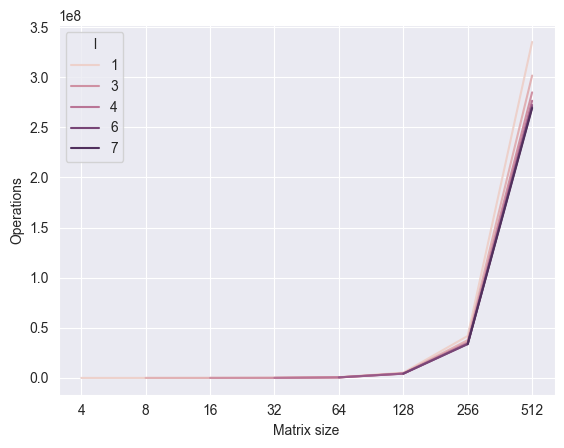

In [30]:
results  = pd.DataFrame(
    data={
        'Additions': additions,
        'Multiplications': multiplications,
        'l': ls,
        'Matrix size': matrix_sizes,
        "exp": exponents
    }
)
results["Operations"] = results["Additions"] + results["Multiplications"]

sns.lineplot(data=results, x='exp', y='Operations', hue='l')
plt.xticks(ticks=results["exp"].unique(), labels=results["Matrix size"].unique())
plt.xlabel("Matrix size")
plt.ylabel("Operations")
plt.show()

In [31]:
times = []
ls = []
matrix_sizes = []

for exp in range(2, 10):
    size = 2**exp
    for l in range(1, exp):
        size = 2**exp
        print(size, end=" \r")
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        
        t1 = time.perf_counter()
        _ = binet_normal_mixed_matmul(A, B, l)
        t2 = time.perf_counter()
        
        matrix_sizes.append(size)
        times.append(t2 - t1)
        ls.append(l)
        

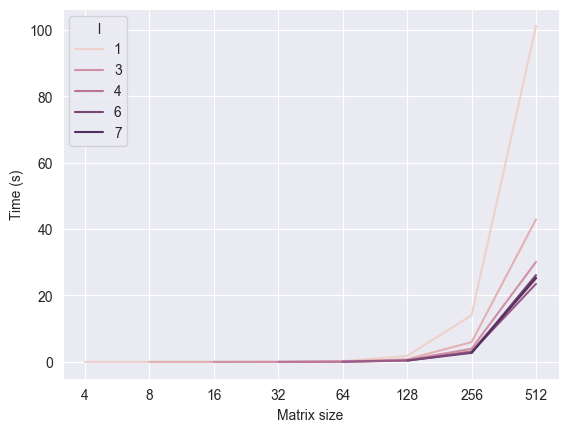

In [32]:
results = pd.DataFrame(
    data={
        'times': times,
        'l': ls,
        'Matrix size': matrix_sizes,
        "exp": exponents
    }
)
sns.lineplot(data=results, x='exp', y='times', hue='l')
plt.xticks(ticks=results["exp"].unique(), labels=results["Matrix size"].unique())
plt.xlabel("Matrix size")
plt.ylabel("Time (s)")
plt.show()